In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from scipy import stats     
import time
import statsmodels.api as sm
import pickle
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,LabelEncoder

In [2]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Checking how big data set is 

In [4]:
df.shape

(1470, 35)

## Checking the information and data types of columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Checking for missing values

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##  Checking how does the data looks mathematically.


In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Obserevations 

- There are no missing value present in any of the column.
- standard deviation in Daily rate and EmployeeNumber is high hence data is spread out.
- mean and median is almost closer to each other hence data looks normally distributed
- -We can observe that MOnthly Income, MOnthly rate are Right skewed because Mean values is greater than the Median Values

## Checking for duplicate values

In [8]:
df.duplicated().sum()

0

## Checking for the correlation


In [9]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:title={'center':'NUll values'}>

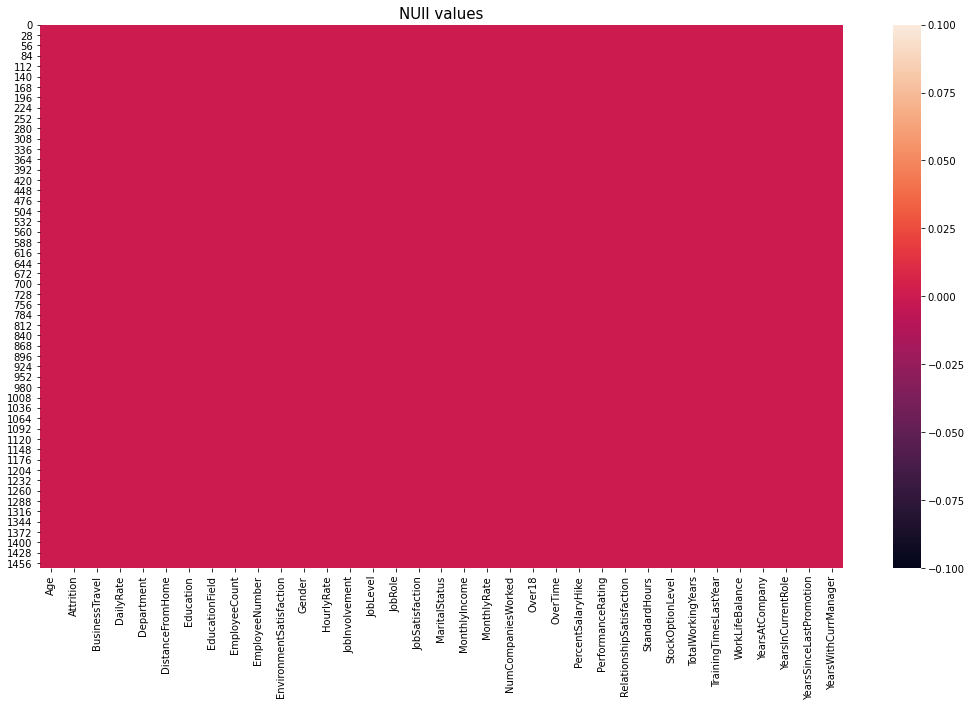

In [10]:
plt.figure(figsize=(18,10))
plt.title('NUll values',fontsize=15)
sns.heatmap(df.isnull())

NO null values present in our dataset.

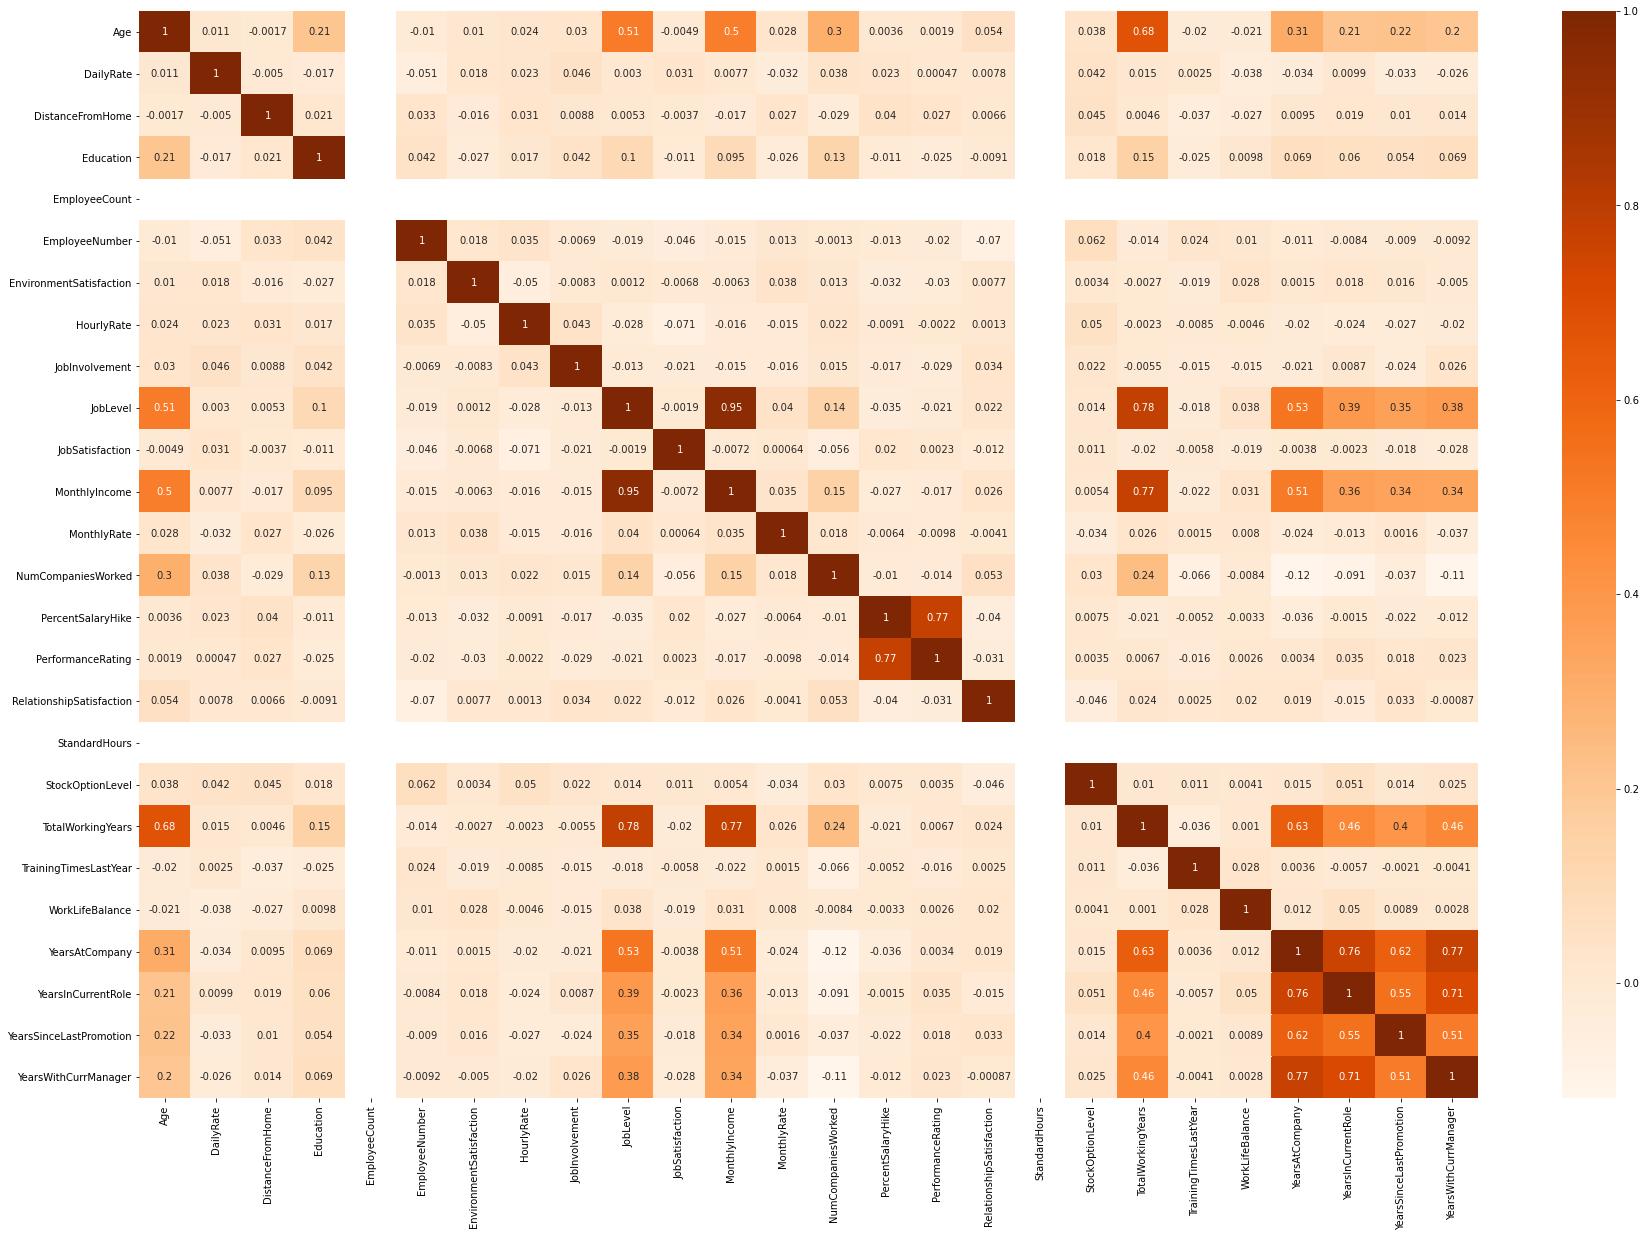

In [11]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap='Oranges')
plt.show()

- Monthly Income column has 95% correlation with joblevel column hence we can drop any one of them


In [12]:
df['EmployeeCount'].nunique()

1

In [13]:
df['StandardHours'].nunique()

1

These columns has only one unique value hence we can drop them

In [14]:
df.drop(columns=['StandardHours',"EmployeeCount","MonthlyIncome"],inplace=True,axis=1)

In [15]:
df.shape

(1470, 32)

# Checking for unique values

In [16]:
for i in df.columns:
    if df[i].dtype =="O":
        print(f"{i} columns has ",df[i].nunique(), "unique values ",df[i].unique())
        print("********************************************************************\n")

Attrition columns has  2 unique values  ['Yes' 'No']
********************************************************************

BusinessTravel columns has  3 unique values  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
********************************************************************

Department columns has  3 unique values  ['Sales' 'Research & Development' 'Human Resources']
********************************************************************

EducationField columns has  6 unique values  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
********************************************************************

Gender columns has  2 unique values  ['Female' 'Male']
********************************************************************

JobRole columns has  9 unique values  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Reso

over18 column has only one unique value therefore wn can drop it from data.

In [17]:
df=df.drop('Over18',axis=True)

In [18]:
df.shape

(1470, 31)

In [19]:
for i in df.columns:
    if df[i].dtype =="O":
        print(f"{i} columns has ")
        print(df[i].value_counts())
        print("********************************************************************\n")

Attrition columns has 
No     1233
Yes     237
Name: Attrition, dtype: int64
********************************************************************

BusinessTravel columns has 
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
********************************************************************

Department columns has 
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
********************************************************************

EducationField columns has 
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
********************************************************************

Gender columns has 
Male      882
Female    588
Name: Gender, dtype: int64
********************************************************************

JobRo

### Univariate analysis.

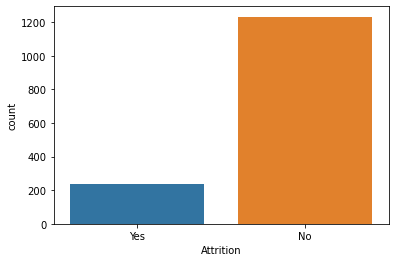

In [20]:
sns.countplot(df['Attrition'])
plt.show()

Looks like output label is imbalanced No class is  5 times more than Yes class.

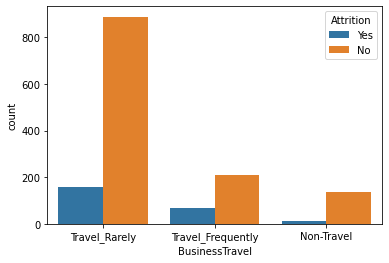

In [21]:
sns.countplot(df['BusinessTravel'],hue=df.Attrition)
plt.show()

- Employee who Travel rarely travels will not leave the jobs as compare to those who not travel.
- Looks like None of the enployee left there job because of bussiness travel.

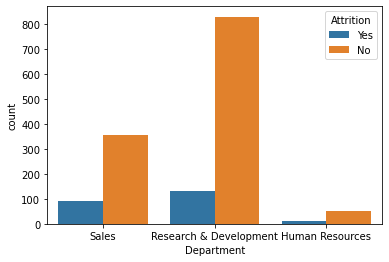

In [22]:
sns.countplot(df['Department'],hue=df.Attrition)
plt.show()

In [23]:
a=df[df['Department']=="Human Resources"]

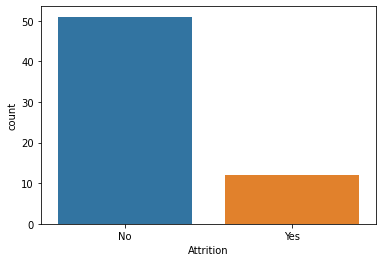

In [24]:
sns.countplot(a["Attrition"])
plt.show()

 - In Human Resources Department only 19 % employee leave there job


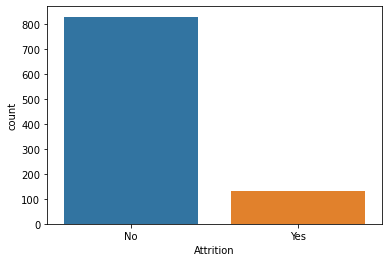

In [25]:
a=df[df['Department']=="Research & Development"]
sns.countplot(a["Attrition"])
plt.show()

In Research & Development department 13 % Employee leave there jobs

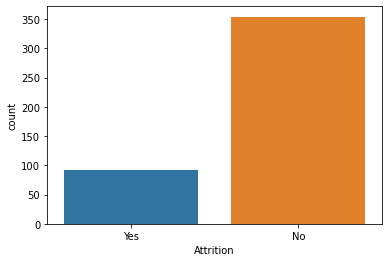

In [26]:
a=df[df['Department']=="Sales"]
sns.countplot(a["Attrition"])
plt.show()

In sales department 20% employee leave there jobs.

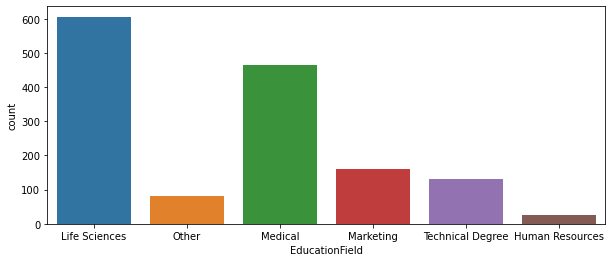

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(df['EducationField'])
plt.show()

Maximum employee are from Life Science field and there are very less numbers of employee from Human Resources background

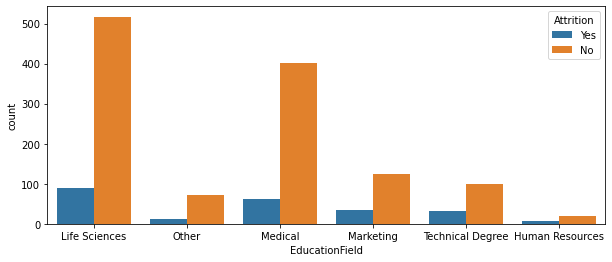

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(df['EducationField'],hue=df.Attrition)
plt.show()

Approx 24 % employee form the Technical Degree leave there jobs 

<AxesSubplot:xlabel='Gender', ylabel='count'>

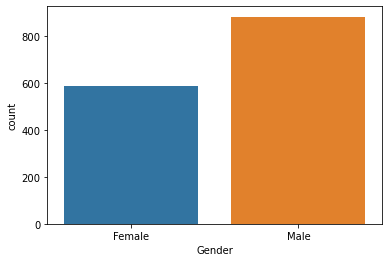

In [29]:
sns.countplot(df['Gender'])

60 % of the employee are male nad 40 % are female

<AxesSubplot:xlabel='Gender', ylabel='count'>

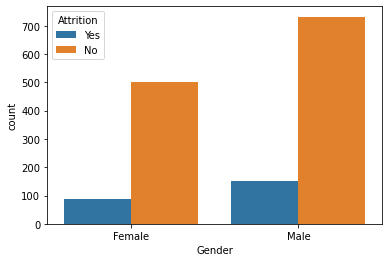

In [30]:
sns.countplot(df['Gender'],hue=df["Attrition"])

- 17% of the male employee leave there jobs 
- 14% of female employee leave there job.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

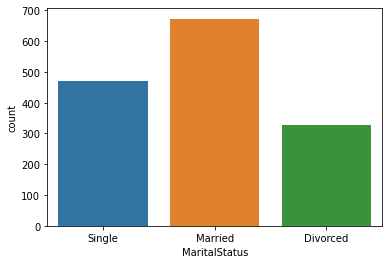

In [31]:
sns.countplot(df['MaritalStatus'])

- most of the employees are married (45.78 %).
- 31.97 % employees are Single &
- 22.22 % employess are Divorced

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

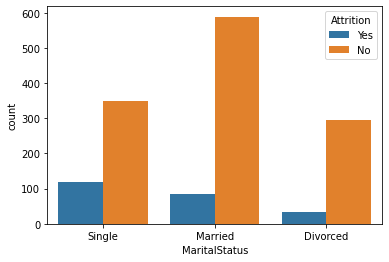

In [32]:
sns.countplot(df['MaritalStatus'],hue=df['Attrition'])

- only 12 % or married employee leave there jobs.
- 10 % Divorced employee leave there jobs & 
- 25 % single employee leaves there jobs

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

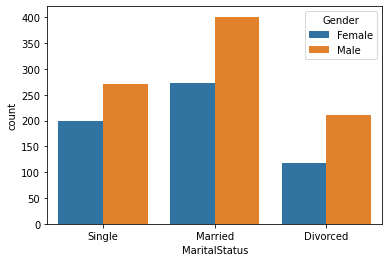

In [33]:
sns.countplot(df['MaritalStatus'],hue=df["Gender"])

Male employees are more and male employee are divorced more than female 

<AxesSubplot:xlabel='OverTime', ylabel='count'>

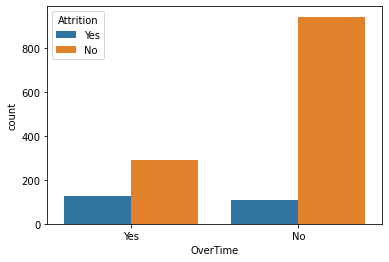

In [34]:
sns.countplot(df['OverTime'],hue=df['Attrition'])

The employee who dosen't do overtime have not leave there job.

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

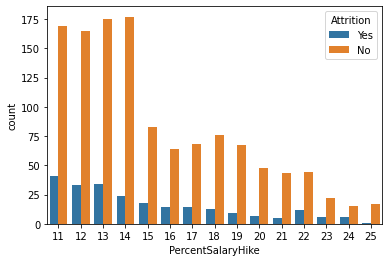

In [35]:
sns.countplot(df['PercentSalaryHike'],hue='Attrition',data=df)

It is clearly visible that an employee who got least salary hike in year have higher tendency for job change.

In [36]:
integers = []
for i in df.columns:
    if df[i].dtype == "object":
        pass
    else:
        integers.append(i)
    

In [37]:
len(integers)

23

In [38]:
Categorical = []
for i in df.columns:
    if df[i].dtype == "object":
        Categorical.append(i)

In [39]:
len(Categorical)

8

# Checking the distribution 

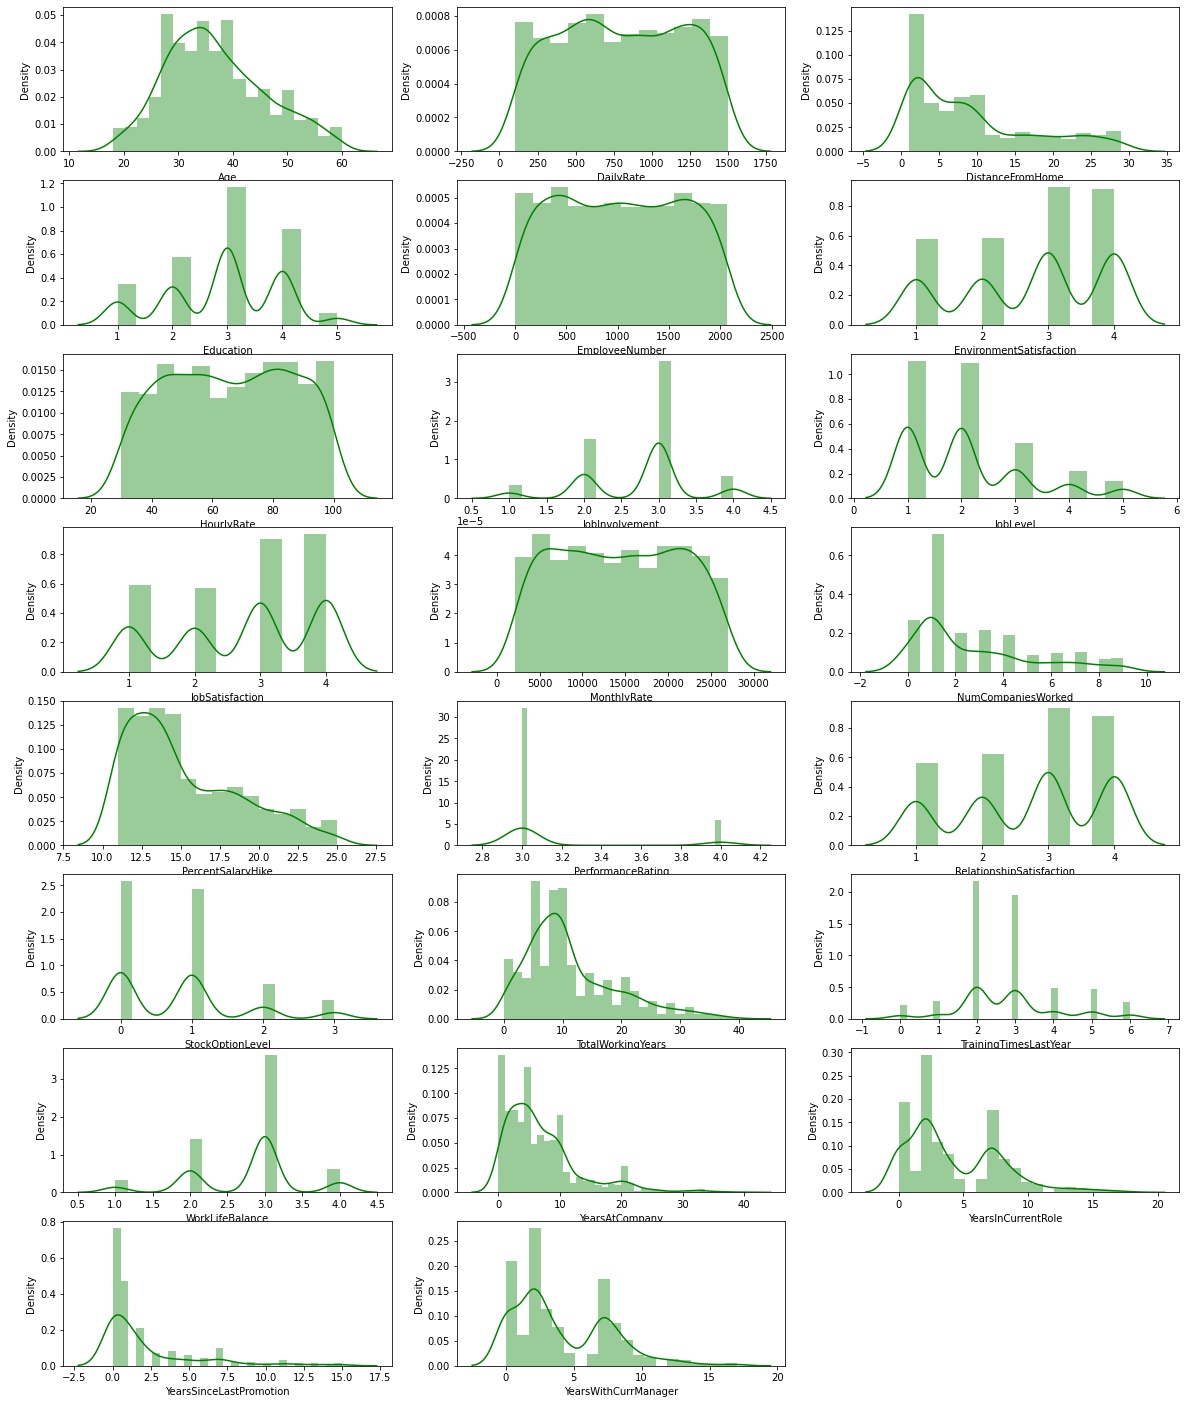

In [40]:
integers
plt.figure(figsize=(20,25))
for i,j in enumerate(integers):
    plt.subplot(8,3,i+1)
    sns.distplot(df[j],color='g')
    plt.xlabel(j)
plt.show()    
    

most f the olumns looks normally distributed DistanceFromHome,PercentSalaryHike,StockOptionLevel,YearsSinceLastPromotion & YearsWithCurrManager are righg skewed

# Checking Outliers

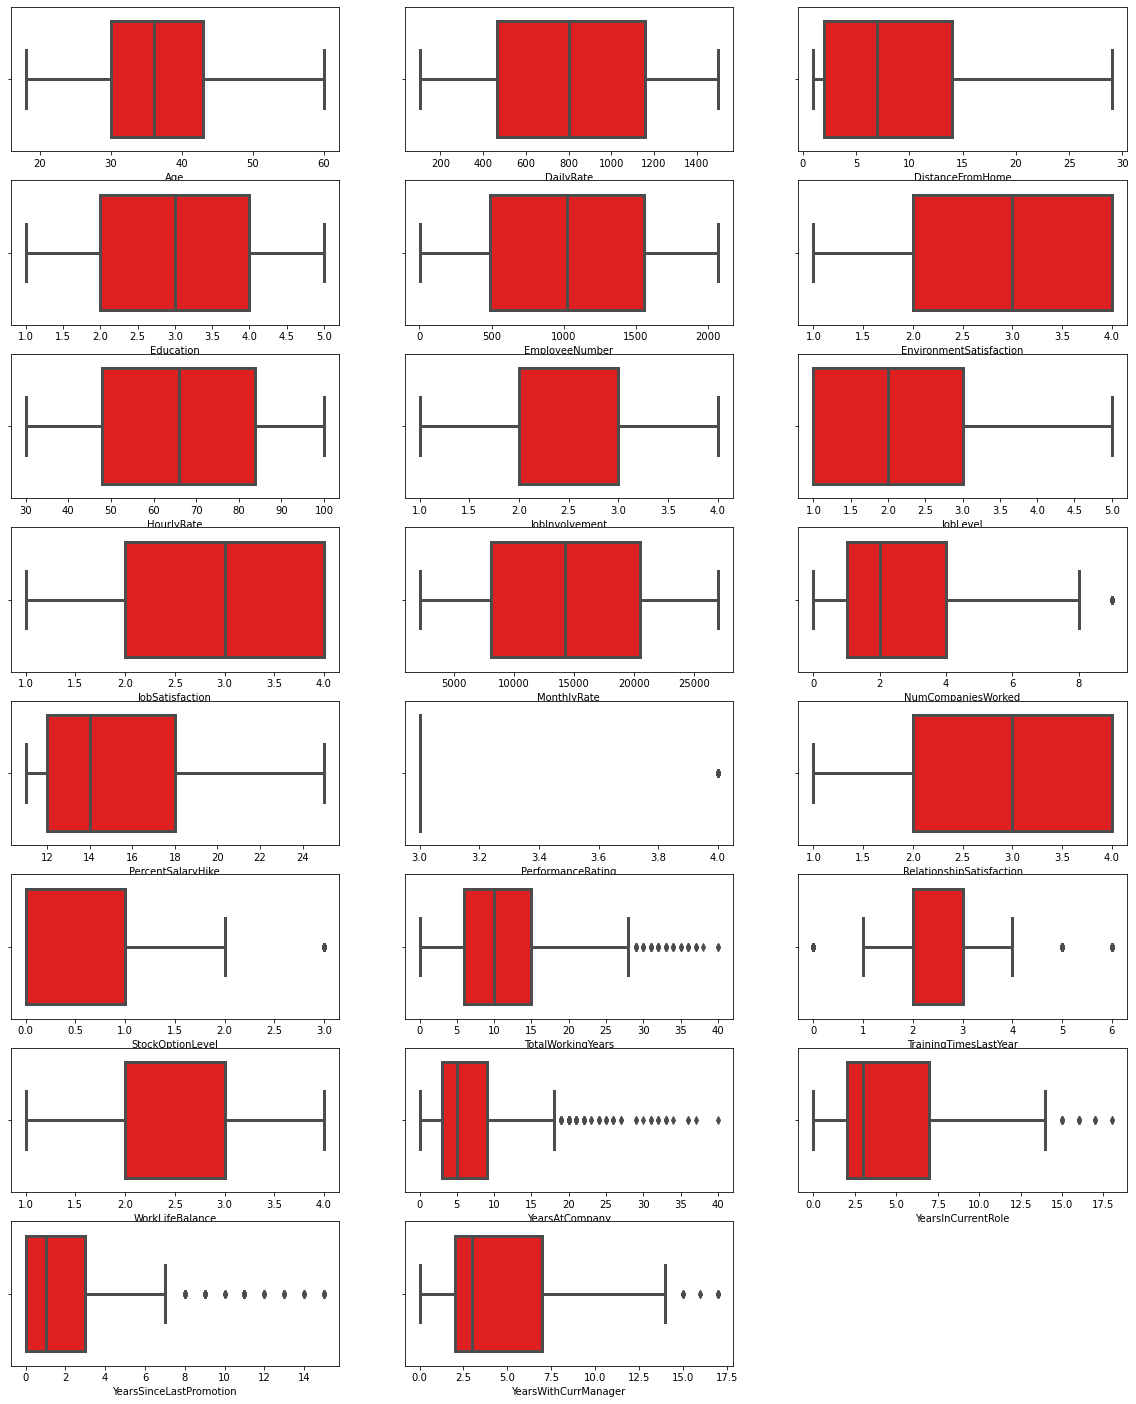

In [41]:
integers
plt.figure(figsize=(20,25))
for i,j in enumerate(integers):
    plt.subplot(8,3,i+1)
    sns.boxplot(df[j],color='r',linewidth=3)
    plt.xlabel(j)
plt.show()    

In [42]:
num_having_outliers=["NumCompaniesWorked",'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [43]:
len(num_having_outliers)

7

# Removing outliers using IQR method

In [44]:
for i in num_having_outliers:
    IQR = df[i].quantile(.75) - df[i].quantile(.25)
    upper =  df[i].quantile(.75) + 1.5 * IQR
    lower =  df[i].quantile(.75) - 1.5 * IQR
    df[i] = np.where(df[i]> upper ,upper , np.where(df[i]<lower , lower ,df[i]))

# Boxplot After removing outliers

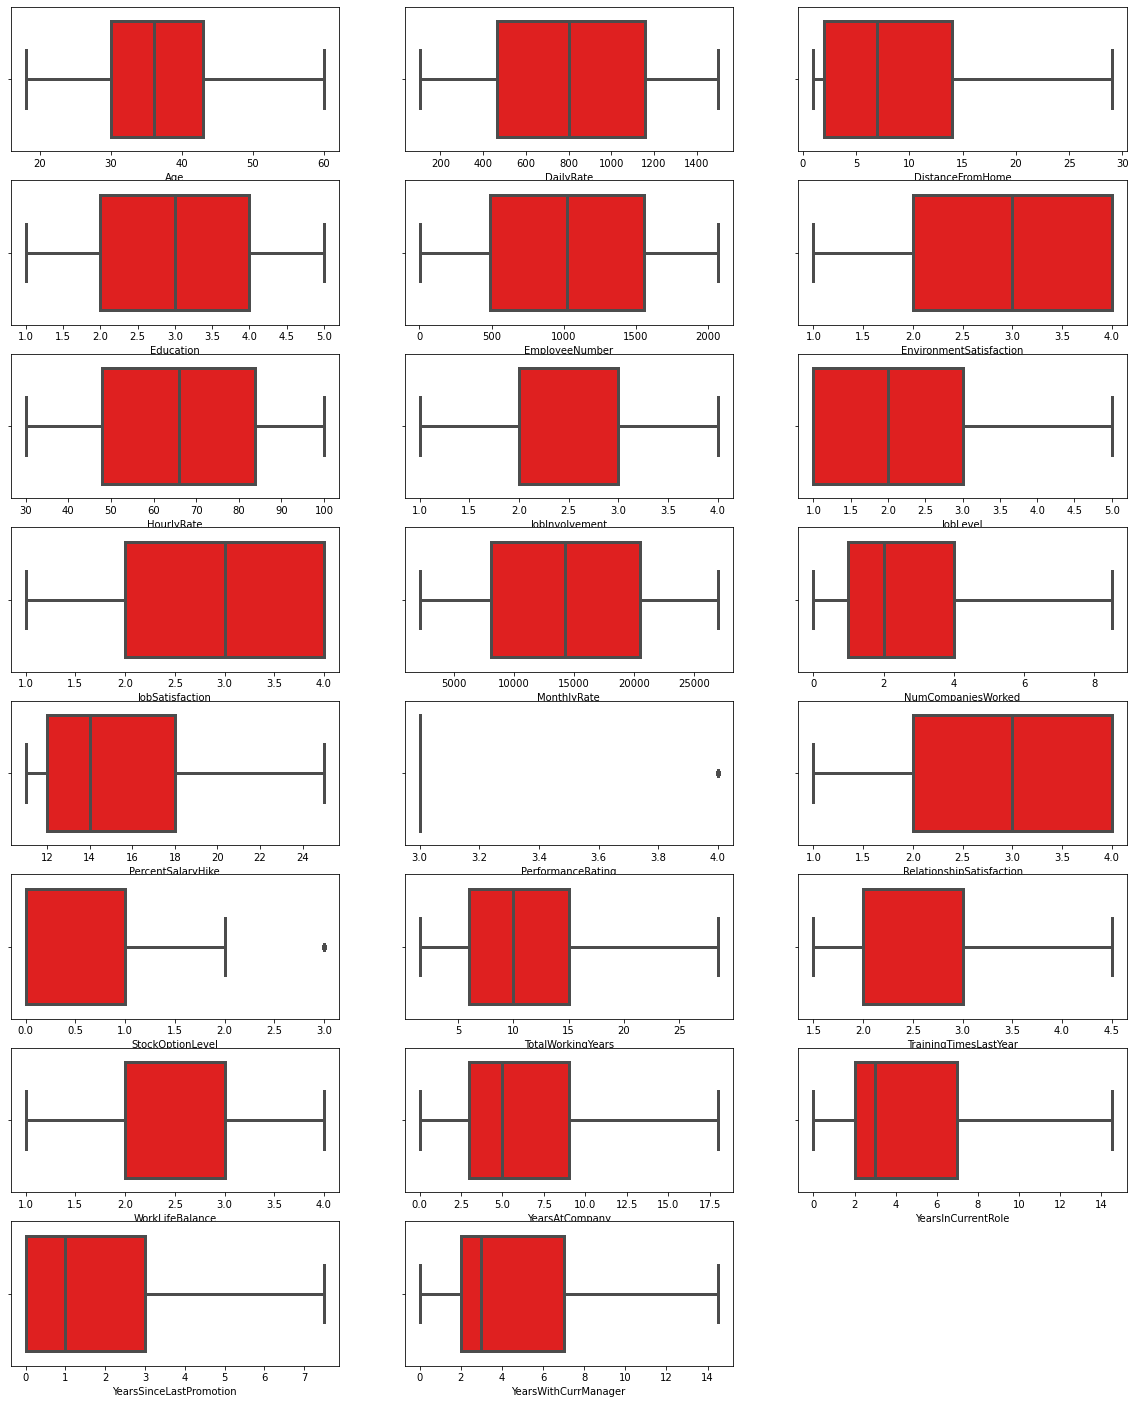

In [45]:
plt.figure(figsize=(20,25))
for i,j in enumerate(integers):
    plt.subplot(8,3,i+1)
    sns.boxplot(df[j],color='r',linewidth=3)
    plt.xlabel(j)
plt.show()  

# checking skewness

In [46]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyRate                 0.018578
NumCompaniesWorked          0.971516
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.889105
TrainingTimesLastYear       0.559961
WorkLifeBalance            -0.552480
YearsAtCompany              0.900774
YearsInCurrentRole          0.803704
YearsSinceLastPromotion     1.262563
YearsWithCurrManager        0.741000
dtype: float64

In [47]:
col_having_skewness=[]
for i in integers:
    if (df[i].skew()>0.5) :
        col_having_skewness.append(i)
    

In [48]:
col_having_skewness

['DistanceFromHome',
 'JobLevel',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

These are the columns having skewness

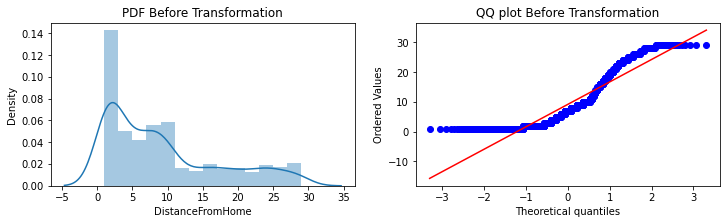

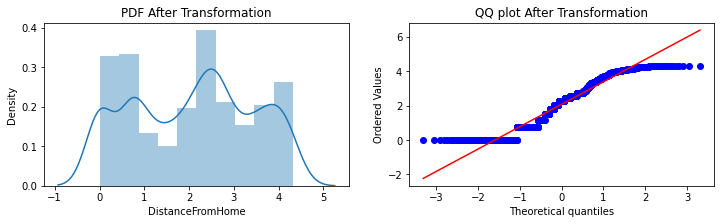

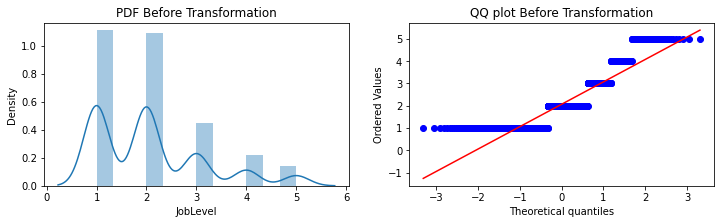

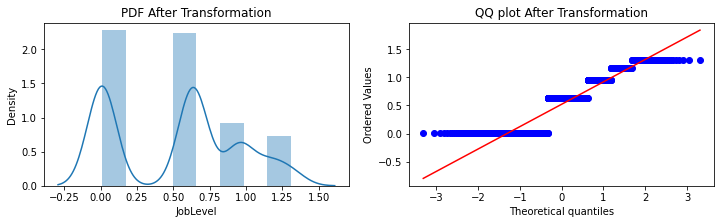

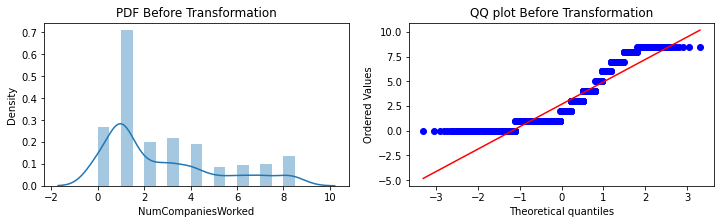

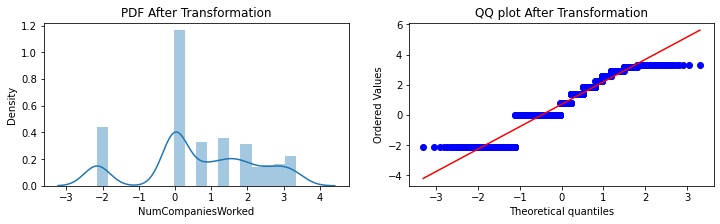

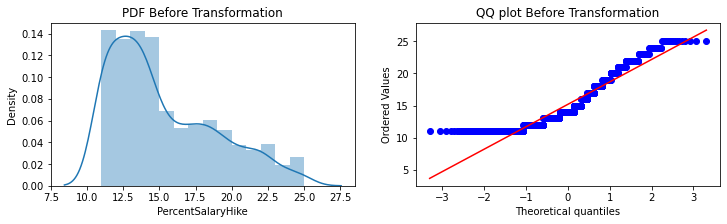

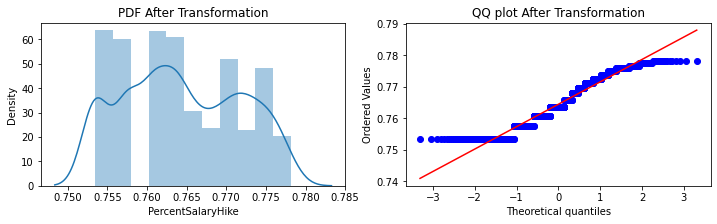

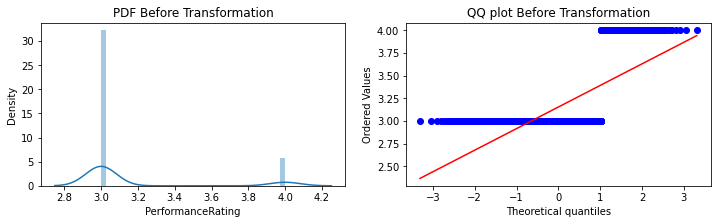

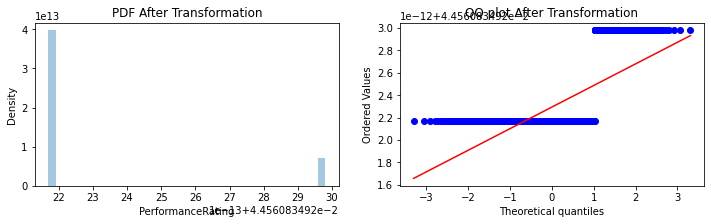

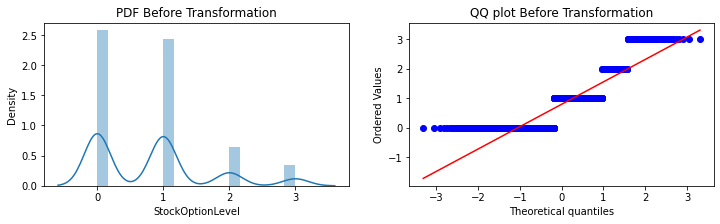

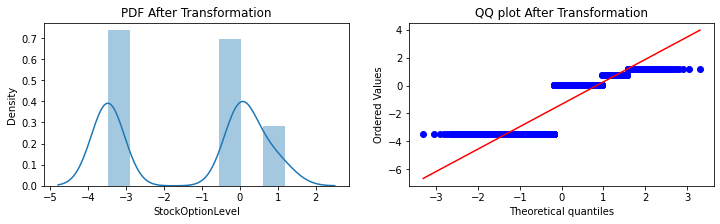

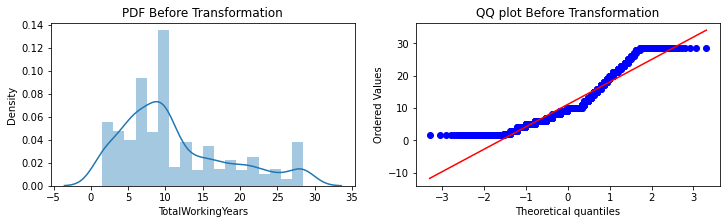

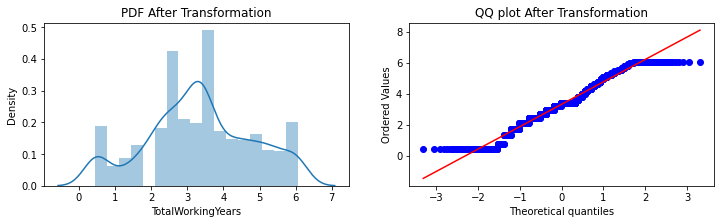

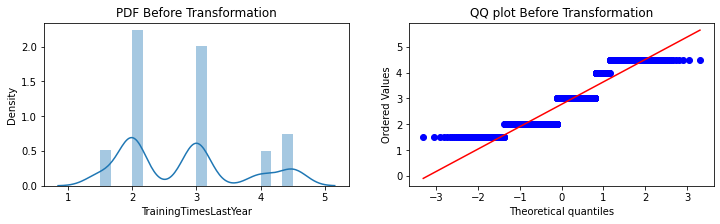

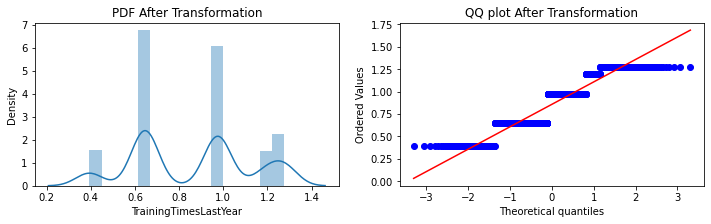

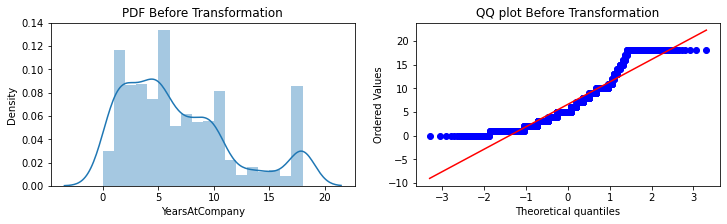

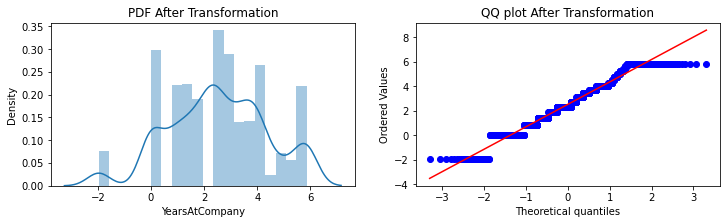

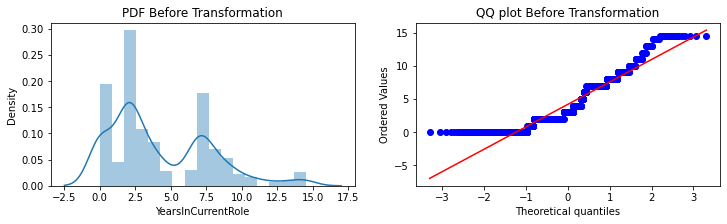

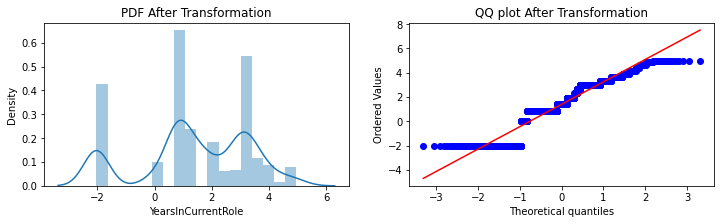

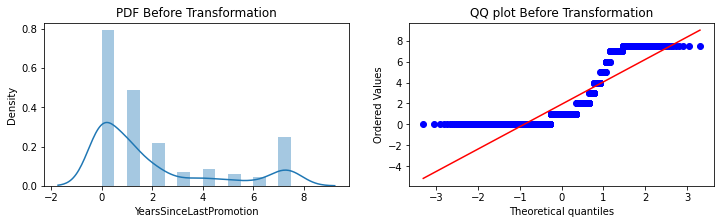

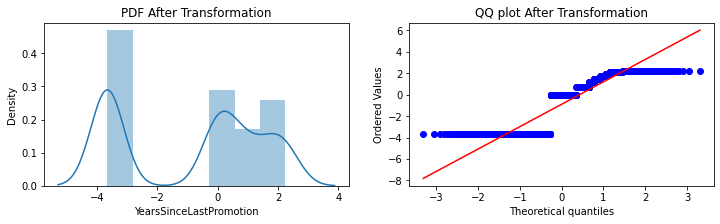

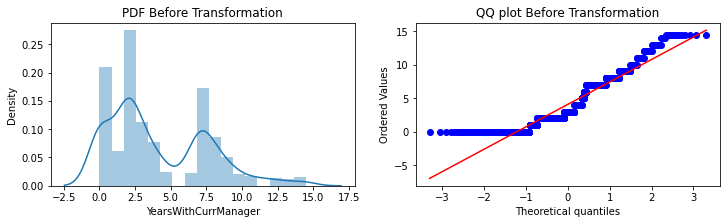

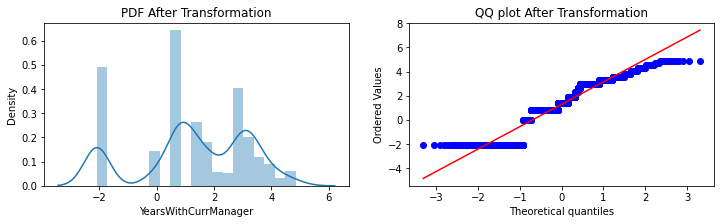

In [49]:
# performing Boxcox transformation on right skewed columns
for i, j in enumerate(col_having_skewness):
    plt.figure(figsize=(12,3))
    plt.subplot(2,6,i+1)
    plt.subplot(1,2,1)
    sns.distplot(df[j])
    plt.title('PDF Before Transformation')
    plt.subplot(1,2,2)
    stats.probplot(df[j], dist="norm", plot=plt)
    plt.title('QQ plot Before Transformation')
    df[j],params = stats.boxcox(df[j]+0.01)
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.distplot(df[j])
    plt.title('PDF After Transformation')
    plt.subplot(1,2,2)
    stats.probplot(df[j], dist="norm", plot=plt)
    plt.title('QQ plot After Transformation')
    plt.show()

In [50]:
df[col_having_skewness].skew()

DistanceFromHome          -0.059332
JobLevel                   0.057751
NumCompaniesWorked        -0.248866
PercentSalaryHike          0.111524
PerformanceRating          0.000000
StockOptionLevel          -0.195507
TotalWorkingYears         -0.040542
TrainingTimesLastYear      0.027475
YearsAtCompany            -0.102489
YearsInCurrentRole        -0.435471
YearsSinceLastPromotion   -0.163680
YearsWithCurrManager      -0.453930
dtype: float64

We sucessfully removed skewness form the data

# splitting data into to variables

In [51]:
X=df.drop('Attrition',axis=1)
y = df["Attrition"]

In [52]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,0.009957,2,Life Sciences,1,2,Female,94,3,0.636510,Sales Executive,4,Single,19479,3.194386,Yes,0.753480,0.044561,1,-3.482033,2.972425,0.393423,1,2.737523,1.888470,-3.659069,2.278384
1,49,Travel_Frequently,279,Research & Development,2.420497,1,Life Sciences,2,3,Male,61,2,0.636510,Research Scientist,2,Married,24907,0.009969,No,0.776661,0.044561,4,0.009957,3.426640,0.974942,3,4.003201,3.020351,0.009955,2.972692
2,37,Travel_Rarely,1373,Research & Development,0.733890,2,Other,4,4,Male,92,2,0.009937,Laboratory Technician,3,Single,2396,2.586940,Yes,0.765874,0.044561,2,-3.482033,2.715981,0.974942,3,-1.965306,-2.030169,-3.659069,-2.077852
3,33,Travel_Frequently,1392,Research & Development,1.192776,4,Life Sciences,5,4,Female,56,3,0.009937,Research Scientist,3,Married,23159,0.009969,Yes,0.753480,0.044561,3,-3.482033,2.972425,0.974942,3,3.414935,3.020351,1.167578,-2.077852
4,27,Travel_Rarely,591,Research & Development,0.733890,1,Medical,7,1,Male,40,3,0.009937,Laboratory Technician,2,Married,16632,3.331257,No,0.757459,0.044561,4,0.009957,2.433477,0.974942,3,0.817996,0.811874,0.724109,0.807604


In [53]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [54]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Its a case of imbalanced class hence we have to make it balance

# Performing Label Encoding on target variable

In [55]:
le=LabelEncoder()
y=le.fit_transform(y)

In [56]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [57]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [114]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

# Creating pipeline

In [60]:
step1 = ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(drop='first',sparse=True,),[1,3,6,9,13,15,18])
],remainder='passthrough')

step2 = ColumnTransformer(transformers=[
    ('Scaler',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')


pipe = Pipeline([
    
    ('step1',step1),
    ('step2',step2),
])

In [61]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  [1, 3, 6, 9, 13, 15, 18])])),
                ('step2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaler', StandardScaler(),
                                                  slice(0, 31, None))]))])

In [62]:
X=pipe.fit_transform(X)

In [63]:
X=pd.DataFrame(X)

In [64]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,-0.481859,0.639841,-1.374051,1.515244,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746,0.446350,0.742527,-1.544277,-0.891688,-1.701283,-0.660531,1.383138,0.379672,0.266157,1.153254,19479.0,3.194386,0.753480,0.044561,1.0,-3.482033,2.972425,0.393423,1.0,2.737523,1.888470,-3.659069,2.278384
1,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,1.322365,-1.297775,0.252096,-1.868426,-1.699621,0.254625,-0.240677,-1.026167,0.266157,-0.660853,24907.0,0.009969,0.776661,0.044561,4.0,0.009957,3.426640,0.974942,3.0,4.003201,3.020351,0.009955,2.972692
2,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746,0.008343,1.414363,-1.004791,-0.891688,-1.696298,1.169781,1.284725,-1.026167,-1.180939,0.246200,2396.0,2.586940,0.765874,0.044561,2.0,-3.482033,2.715981,0.974942,3.0,-1.965306,-2.030169,-3.659069,-2.077852
3,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746,-0.429664,1.461466,-0.662822,1.061787,-1.694636,1.169781,-0.486709,0.379672,-1.180939,0.246200,23159.0,0.009969,0.753480,0.044561,3.0,-3.482033,2.972425,0.974942,3.0,3.414935,3.020351,1.167578,-2.077852
4,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,-1.086676,-0.524295,-1.004791,-1.868426,-1.691313,-1.575686,-1.274014,0.379672,-1.180939,-0.660853,16632.0,3.331257,0.757459,0.044561,4.0,0.009957,2.433477,0.974942,3.0,0.817996,0.811874,0.724109,0.807604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2.075297,-1.562889,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,-0.101159,0.202082,1.391817,-0.891688,1.721670,0.254625,-1.224807,1.785511,0.266157,1.153254,12290.0,1.837976,0.769654,0.044561,3.0,0.009957,4.648859,0.974942,3.0,2.350848,0.811874,-3.659069,1.391040
1466,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,0.227347,-0.469754,-0.029732,-1.868426,1.723332,1.169781,-1.175601,-1.026167,0.998619,-1.567907,21457.0,1.837976,0.765874,0.044561,1.0,0.009957,3.208064,1.275803,3.0,3.089749,3.020351,0.009955,2.972692
1467,-0.481859,0.639841,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,3.022901,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,1.591746,-1.086676,-1.605183,-0.407713,0.085049,1.726655,-0.660531,1.038693,1.785511,0.266157,-0.660853,5174.0,0.009969,0.773751,0.044561,2.0,0.009957,2.433477,0.393423,3.0,2.737523,0.811874,-3.659069,1.391040
1468,2.075297,-1.562889,-1.374051,1.515244,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,1.088232,-0.685565,-0.628241,1.322365,0.546677,-1.004791,0.085049,1.728317,1.169781,-0.142264,-1.026167,0.266157,-0.660853,13243.0,0.801349,0.763520,0.044561,4.0,-3.482033,4.648859,0.974942,2.0,3.718189,2.681374,-3.659069,3.275797


In [65]:
y = pd.DataFrame(y)

In [66]:
y.value_counts()

0    1233
1     237
dtype: int64

# Performing SMOTE to make balance classes

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
smote = SMOTE(sampling_strategy='minority')
X,y = smote.fit_resample(X, y)

In [69]:
X.shape

(2466, 44)

In [70]:
y.shape

(2466, 1)

In [71]:
y.value_counts()

1    1233
0    1233
dtype: int64

 Now our data is balanced

# Feature Selection

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(X,y)

ExtraTreesClassifier()

In [74]:
print(extra.feature_importances_)

[0.03096429 0.02333912 0.02685803 0.02581835 0.02313447 0.0092739
 0.02438181 0.00459229 0.0121613  0.02309514 0.00480739 0.02316902
 0.00657801 0.01069991 0.00577336 0.0139471  0.01994685 0.01436426
 0.02740541 0.05086193 0.11301779 0.01972369 0.01782017 0.01868627
 0.01760358 0.01732521 0.03101979 0.01702177 0.0232338  0.04105549
 0.02564252 0.01709737 0.0180791  0.01562098 0.         0.02191794
 0.03889942 0.02752263 0.01901179 0.01767779 0.02452473 0.02909997
 0.01877668 0.02844955]


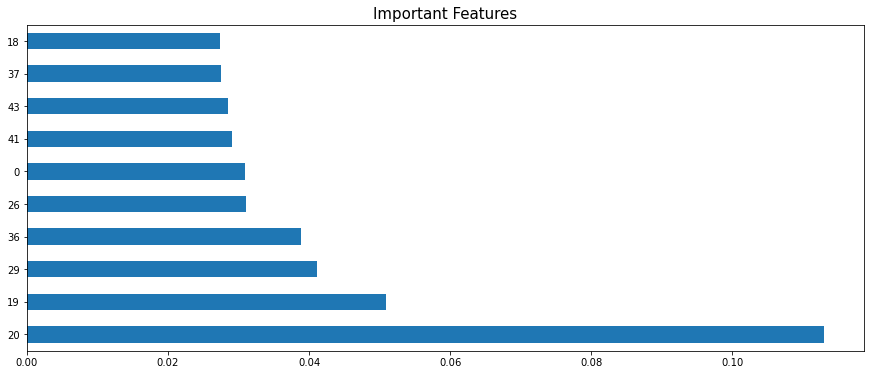

In [75]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

Selecting top 10 features

In [76]:
X=X[[0,3,14,19,20,26,29,30,36,43]]

In [77]:
y.head()

,0
0,1
1,0
2,1
3,0
4,0


# Creating function to select best model

In [78]:
def max_accuracy_score(pipe,X,y):
    max_accuracy=0
    for i in range(42,100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
        pipe.fit(X_train,y_train)
        y_pred=pipe.predict(X_test)
        y_train_pred =pipe.predict(X_train)
        accuracy_check=accuracy_score(y_test,y_pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max Accuracy score corresponding to',final_r,'is',max_accuracy)
    print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy').mean()*100)
    print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy').std()*100)
    print('Training accuracy',round(accuracy_score(y_train_pred,y_train),2)*100)
    print('Test Accuracy',round(accuracy_score(y_pred,y_test),2)*100)
    print('Confusion Matrix\n')
    print(confusion_matrix(y_test,y_pred))
    print('Classification Report',classification_report(y_test,y_pred))

# LogisticRegression

In [79]:
lr=LogisticRegression()
max_accuracy_score(lr,X,y)

max Accuracy score corresponding to 93 is 0.8076923076923077
cross validation score 77.08887994678535
Standard Deviation 0.94774468271967
Training accuracy 78.0
Test Accuracy 74.0
Confusion Matrix

[[181  66]
 [ 61 186]]
Classification Report               precision    recall  f1-score   support

           0       0.75      0.73      0.74       247
           1       0.74      0.75      0.75       247

    accuracy                           0.74       494
   macro avg       0.74      0.74      0.74       494
weighted avg       0.74      0.74      0.74       494



# DecisionTreeClassifier

In [80]:
dt=DecisionTreeClassifier()
max_accuracy_score(dt,X,y)

max Accuracy score corresponding to 73 is 0.8967611336032388
cross validation score 85.12839674470933
Standard Deviation 12.712280610068543
Training accuracy 99.0
Test Accuracy 87.0
Confusion Matrix

[[217  30]
 [ 35 212]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.88      0.87       247
           1       0.88      0.86      0.87       247

    accuracy                           0.87       494
   macro avg       0.87      0.87      0.87       494
weighted avg       0.87      0.87      0.87       494



# KNN

In [81]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,X,y)

max Accuracy score corresponding to 92 is 0.8643724696356275
cross validation score 83.49754867743553
Standard Deviation 3.1537241327014973
Training accuracy 90.0
Test Accuracy 80.0
Confusion Matrix

[[199  48]
 [ 49 198]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.81      0.80       247
           1       0.80      0.80      0.80       247

    accuracy                           0.80       494
   macro avg       0.80      0.80      0.80       494
weighted avg       0.80      0.80      0.80       494



# Naive Bayse

In [82]:
NB=GaussianNB()
max_accuracy_score(NB,X,y)

max Accuracy score corresponding to 47 is 0.757085020242915
cross validation score 71.12760837966347
Standard Deviation 1.4602826790079813
Training accuracy 72.0
Test Accuracy 70.0
Confusion Matrix

[[134 113]
 [ 34 213]]
Classification Report               precision    recall  f1-score   support

           0       0.80      0.54      0.65       247
           1       0.65      0.86      0.74       247

    accuracy                           0.70       494
   macro avg       0.73      0.70      0.69       494
weighted avg       0.73      0.70      0.69       494



# SVC

In [83]:
scv=SVC()
max_accuracy_score(scv,X,y)

max Accuracy score corresponding to 64 is 0.868421052631579
cross validation score 83.78349524927937
Standard Deviation 5.121645300963371
Training accuracy 87.0
Test Accuracy 81.0
Confusion Matrix

[[211  36]
 [ 56 191]]
Classification Report               precision    recall  f1-score   support

           0       0.79      0.85      0.82       247
           1       0.84      0.77      0.81       247

    accuracy                           0.81       494
   macro avg       0.82      0.81      0.81       494
weighted avg       0.82      0.81      0.81       494



# RandomForestClassifier

In [84]:
rf=RandomForestClassifier()
max_accuracy_score(rf,X,y)

max Accuracy score corresponding to 92 is 0.9311740890688259
cross validation score 88.7383695625395
Standard Deviation 14.674074621089641
Training accuracy 99.0
Test Accuracy 90.0
Confusion Matrix

[[228  19]
 [ 31 216]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.92      0.90       247
           1       0.92      0.87      0.90       247

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



# Adaboost

In [85]:
ada=AdaBoostClassifier()
max_accuracy_score(ada,X,y)

max Accuracy score corresponding to 64 is 0.937246963562753
cross validation score 87.36152285848027
Standard Deviation 16.786141010938906
Training accuracy 92.0
Test Accuracy 90.0
Confusion Matrix

[[231  16]
 [ 35 212]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.94      0.90       247
           1       0.93      0.86      0.89       247

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



# GRadient Boost

In [86]:
GB=GradientBoostingClassifier()
max_accuracy_score(GB,X,y)

max Accuracy score corresponding to 49 is 0.9352226720647774
cross validation score 87.92947417693868
Standard Deviation 17.10070862767357
Training accuracy 93.0
Test Accuracy 91.0
Confusion Matrix

[[232  15]
 [ 31 216]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.94      0.87      0.90       247

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494



# ExtraTree

In [87]:
etc=ExtraTreesClassifier()
max_accuracy_score(etc,X,y)

max Accuracy score corresponding to 92 is 0.9352226720647774
cross validation score 89.91213014592965
Standard Deviation 12.085786194630325
Training accuracy 99.0
Test Accuracy 89.0
Confusion Matrix

[[226  21]
 [ 31 216]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.91      0.90       247
           1       0.91      0.87      0.89       247

    accuracy                           0.89       494
   macro avg       0.90      0.89      0.89       494
weighted avg       0.90      0.89      0.89       494



# VotingClassifier

In [88]:
es=[('etc',ExtraTreesClassifier()),("GB",GradientBoostingClassifier()),
    ( "dt",DecisionTreeClassifier() )]
vc=VotingClassifier(estimators=es)
max_accuracy_score(vc,X,y)

max Accuracy score corresponding to 92 is 0.9352226720647774
cross validation score 88.5766726067783
Standard Deviation 14.89812101778513
Training accuracy 99.0
Test Accuracy 90.0
Confusion Matrix

[[229  18]
 [ 31 216]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.93      0.90       247
           1       0.92      0.87      0.90       247

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



# BaggingClassifier

In [89]:
bc=BaggingClassifier()
max_accuracy_score(bc,X,y)

max Accuracy score corresponding to 89 is 0.9230769230769231
cross validation score 87.765477823127
Standard Deviation 14.504342864366201
Training accuracy 98.0
Test Accuracy 88.0
Confusion Matrix

[[226  21]
 [ 36 211]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.91      0.89       247
           1       0.91      0.85      0.88       247

    accuracy                           0.88       494
   macro avg       0.89      0.88      0.88       494
weighted avg       0.89      0.88      0.88       494



# BaggingClassifier with base GradientBoostingClassifier

In [90]:
bcgb=BaggingClassifier(base_estimator=GradientBoostingClassifier())
max_accuracy_score(bcgb,X,y)

max Accuracy score corresponding to 79 is 0.9331983805668016
cross validation score 87.84809191022494
Standard Deviation 16.935443143538468
Training accuracy 93.0
Test Accuracy 90.0
Confusion Matrix

[[231  16]
 [ 33 214]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.94      0.90       247
           1       0.93      0.87      0.90       247

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



# Selecting  GradientBoostingClassifier as the best model

In [160]:
gb=GradientBoostingClassifier()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0,stratify=y)
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
y_train_pred = gb.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print('cross validation score',round(cross_val_score(gb,X,y,scoring='accuracy').mean(),2)*100)
print('Standard Deviation',round(cross_val_score(gb,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred),2))


Training accuracy 93.0
Testing accuracy 92.0
cross validation score 88.0
Standard Deviation 17.0
Confusion Matrix
[[243   4]
 [ 36 211]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.98      0.85      0.91       247

    accuracy                           0.92       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.92      0.92       494

Roc_auc Score 0.92


- Since Training and testing accuracy is same which is 92 % it means our model is not overfitting. 

### Hyper parameter tuning for GradientBoostingClassifier

In [173]:
params = {
    
    "loss":['deviance', 'exponential'],
    "learning_rate":[0.1,0.001,0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,1],
    "criterion":['friedman_mse', 'squared_error', 'mse', 'mae'],
    "max_features":['auto', 'sqrt', 'log2']
 
}

In [174]:
randomscv=RandomizedSearchCV(GradientBoostingClassifier(),params,cv=10,n_jobs=-1,scoring="accuracy")

In [175]:
randomscv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.1, 0.001, 0.01,
                                                          0.02, 0.03, 0.04,
                                                          0.05, 0.06, 0.07,
                                                          0.08, 0.09, 1],
                                        'loss': ['deviance', 'exponential'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']},
                   scoring='accuracy')

In [176]:
randomscv.best_params_

{'max_features': 'auto',
 'loss': 'exponential',
 'learning_rate': 0.08,
 'criterion': 'mse'}

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0,stratify=y)
gb=GradientBoostingClassifier(max_features="auto",loss="exponential",learning_rate=0.08,criterion="mse")
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
y_train_pred = gb.predict(X_train)
print("Training accuracy",round(accuracy_score(y_train,y_train_pred),2)*100)
print("Testing accuracy",round(accuracy_score(y_test,y_pred),2)*100)
print('cross validation score',round(cross_val_score(gb,X,y,scoring='accuracy').mean(),2)*100)
print('Standard Deviation',round(cross_val_score(gb,X,y,scoring='accuracy').std(),2)*100)
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))
print('Roc_auc Score',round(roc_auc_score(y_test,y_pred),2))


Training accuracy 92.0
Testing accuracy 93.0
cross validation score 88.0
Standard Deviation 17.0
Confusion Matrix
[[242   5]
 [ 31 216]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.98      0.87      0.92       247

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494

Roc_auc Score 0.93


Here testing accuracy is increased by 1 % and precission and recall for 0 class is also increased and recall and f1 score is also increased for class 1.

In [178]:
gb

GradientBoostingClassifier(criterion='mse', learning_rate=0.08,
                           loss='exponential', max_features='auto')

# AUC ROC Curve

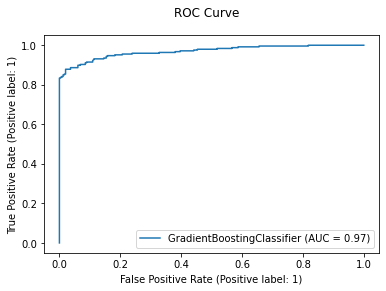

In [180]:
from sklearn import metrics
plot = metrics.plot_roc_curve(gb, X_test, y_test)
plot.figure_.suptitle("ROC Curve")
plt.show()


Auc score is 97 %

# Confussion metrics

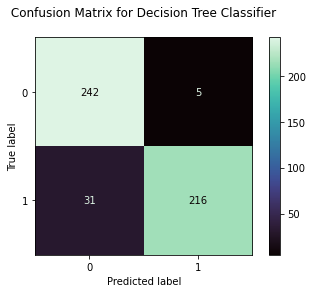

In [183]:
# class_names = df.columns
metrics.plot_confusion_matrix(gb, X_test, y_test, cmap='mako')
plt.title(' Confusion Matrix for Decision Tree Classifier \n')
plt.show()

# Saving the model

In [190]:
pickle.dump(gb,open("HR_analyst.pkl","wb"))

# Predictions

In [229]:
predicted_values = np.array(gb.predict(X_test))
predicted_values

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,